# Diabetes Disease Dataset Analysis and Machine Learning


---

## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection and Analysis


In [2]:
diabetes_dataset = pd.read_csv(r'E:/College/Training/NTI/multiple-disease-prediction-streamlit-app-main/dataset/imbalanced_diabetes.csv') 

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,79,80,25,37,25.4,0.6,22,0
1,9,91,68,0,0,24.2,0.2,58,0
2,6,123,70,34,219,25.4,0.2,37,0
3,6,144,72,27,228,33.9,0.3,40,0
4,6,99,60,19,54,26.9,0.5,32,0


In [4]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3090 non-null   int64  
 1   Glucose                   3090 non-null   int64  
 2   BloodPressure             3090 non-null   int64  
 3   SkinThickness             3090 non-null   int64  
 4   Insulin                   3090 non-null   int64  
 5   BMI                       3090 non-null   float64
 6   DiabetesPedigreeFunction  3090 non-null   float64
 7   Age                       3090 non-null   int64  
 8   Outcome                   3090 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 217.4 KB


In [5]:
diabetes_dataset.shape

(3090, 9)

In [6]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_dataset.describe().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,4.055016,125.750809,69.945955,21.168608,84.098382,32.819515,0.473236,33.288026,0.504854
std,3.507779,32.224940,18.529005,16.117539,116.322522,7.566396,0.323883,11.211808,0.500057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,20.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.900000,0.300000,24.000000,0.000000
50%,3.000000,122.000000,72.000000,24.000000,37.000000,32.800000,0.400000,30.000000,1.000000
75%,6.000000,146.000000,80.000000,34.000000,145.000000,37.500000,0.600000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.300000,81.000000,1.000000


0 --> Non-Diabetic

1 --> Diabetic

## Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [9]:
target_counts = diabetes_dataset['Outcome'].value_counts()

fig = px.pie(target_counts, 
             values=target_counts.values, 
             names=target_counts.index, 
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', 
                  textinfo='percent+label', 
                  marker=dict(line=dict(color='white', width=2)))

fig.show()


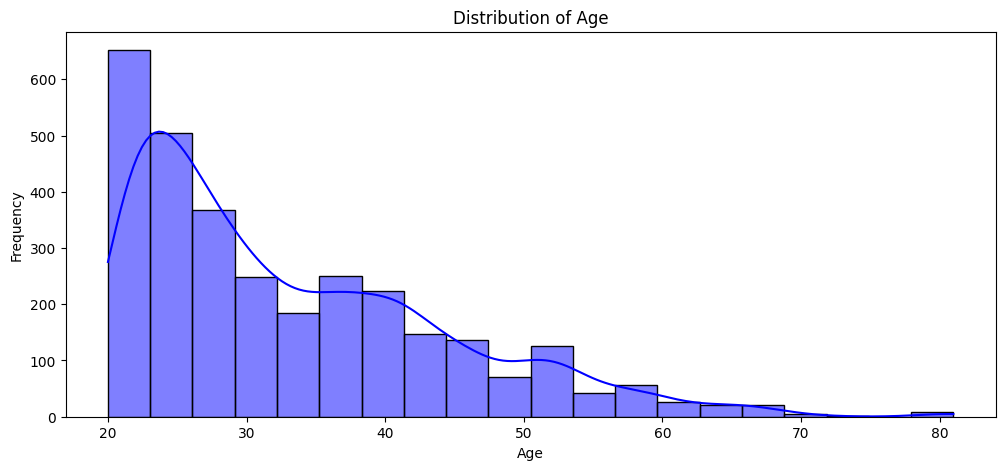

In [10]:
plt.figure(figsize=(12, 5))
sns.histplot(diabetes_dataset['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

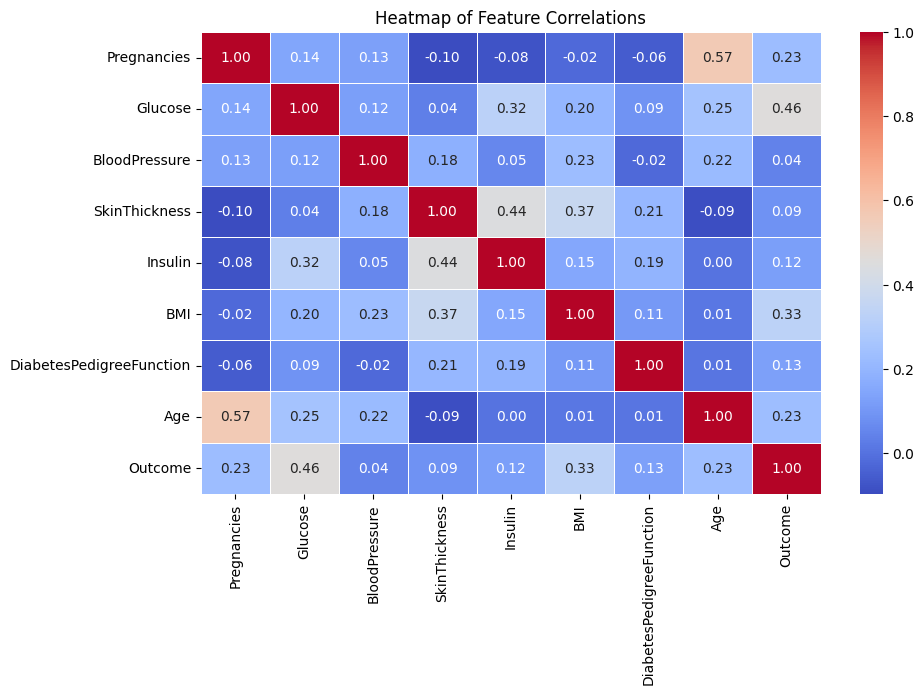

In [11]:
corr_matrix = diabetes_dataset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

## Splitting the Features and Target

In [12]:
Feature = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Target = diabetes_dataset['Outcome']

In [13]:
print(Feature)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               1       79             80             25       37  25.4   
1               9       91             68              0        0  24.2   
2               6      123             70             34      219  25.4   
3               6      144             72             27      228  33.9   
4               6       99             60             19       54  26.9   
...           ...      ...            ...            ...      ...   ...   
3085            3      163             70             18      105  31.6   
3086            2      155             52             27      540  38.7   
3087            3      173             82             48      465  38.4   
3088            4      173             70             14      168  29.7   
3089            4      173             70             14      168  29.7   

      DiabetesPedigreeFunction  Age  
0                          0.6   22  
1                      

In [14]:
print(Target)

0       0
1       0
2       0
3       0
4       0
       ..
3085    1
3086    1
3087    1
3088    1
3089    1
Name: Outcome, Length: 3090, dtype: int64


In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

## Splitting the Data into Training data & Test Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.2, random_state=42, stratify=Target)


## Define XGBoost classifier

In [17]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

## Hyperparameter tuning using GridSearchCV


In [20]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Reduced range
    'learning_rate': [0.01, 0.03, 0.05],  # Lower learning rate for better generalization
    'max_depth': [2, 3, 4],  # Reduce complexity
    'subsample': [0.7, 0.8, 0.9],  # Slightly lower subsample
    'reg_lambda': [1.0, 1.5, 2.0, 2.5],  # Stronger L2 regularization
    'reg_alpha': [0.1, 0.5, 1.0],  # Stronger L1 regularization
    'min_child_weight': [5, 7, 9]  # Higher values prevent small splits (new update)
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=7, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 150, 'reg_alpha': 1.0, 'reg_lambda': 1.0, 'subsample': 0.8}


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:03:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




## Accuracy Score

In [ ]:
train_acc = best_xgb.score(X_train, y_train) * 100
test_acc = best_xgb.score(X_test, y_test) * 100

print(f"XGBoost Train Accuracy: {train_acc:.2f}%")
print(f"XGBoost Test Accuracy: {test_acc:.2f}%")

y_pred = best_xgb.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Train Accuracy: 93.69%
XGBoost Test Accuracy: 90.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       306
           1       0.88      0.93      0.91       312

    accuracy                           0.90       618
   macro avg       0.91      0.90      0.90       618
weighted avg       0.91      0.90      0.90       618



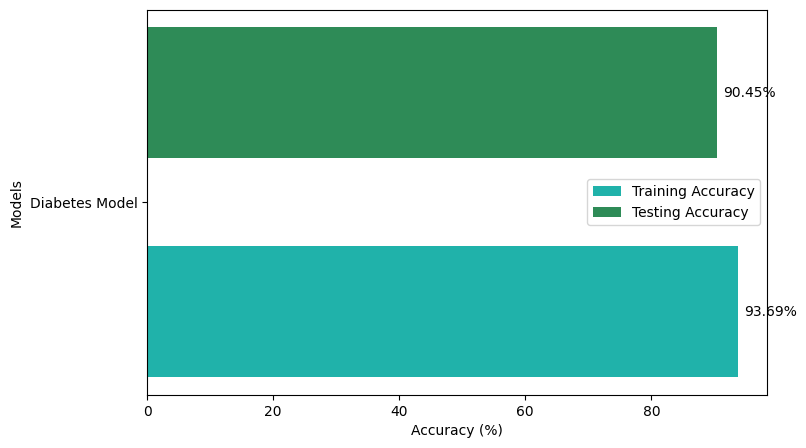

In [22]:
models = ['Diabetes Model']
training_accuracy = [93.69]
testing_accuracy = [90.45]

x = np.arange(len(models))  # Label locations
width = 0.3  # Reduced bar width for more spacing
spacing = 0.2  # Additional spacing between bars

fig, ax = plt.subplots(figsize=(8, 5))

# Bars
bars1 = ax.barh(x - (width + spacing)/2, training_accuracy, width, label='Training Accuracy', color='lightseagreen')
bars2 = ax.barh(x + (width + spacing)/2, testing_accuracy, width, label='Testing Accuracy', color='seagreen')

# Labels and Title
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Models')
ax.set_yticks(x)
ax.set_yticklabels(models)
ax.legend()

# Adding percentage labels
for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center', fontsize=10)

plt.show()


## Test model

In [31]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = best_xgb.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


## Saving the trained model

In [36]:
import pickle

In [37]:
filename = 'diabetes_model.sav'
pickle.dump(best_xgb, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))